## Lab 10.2

### Activity 1
Name: `recaman-198`

Complete this activity before the end of the lab by entering the answer into the Brightspace quiz. Add, commit and push this notebook to your repository.

Consider the following sequence:

* $a_n = a_{n-1} -n$ if $(a_{n-1}-n)>0$ and not $\in[a_0, a_1, \dots a_{n-1}]$
* $a_n = a_{n-1} +n$ else
* $a_0 = 0$

1. Calculate the elements of the seqeunce up to $n=198$.
2. Make a plot of $a_n$ vs. $n$. 
2. Enter element $a_{198}$ into quiz `recaman-198`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit 

In [4]:
## notes on for-loops:
#try numba to speed up for loops (it uses a c solver instead of python)
# for-loops are fine if the bottleneck is the stmts inside the loop
# when they start to suck is when the bottleneck is the loop itself (repeating slows it down)
#note: numpy also is programmed in C, which speeds it up 


#sol:
aa = [0]
for i in range(1,201):
    t1 = aa[-1] -1
    t2 = aa[-1] +1
    if (t1>0) * (t1 not in aa):
        aa.append(t1)
    else:
        aa.append(t2)

59


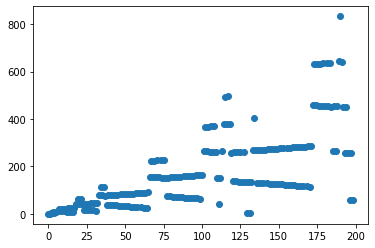

In [5]:
def recaman(n):
    a = [0]
    for i in range(1,n+1):
        if (a[i-1] - i) >0 and (a[i-1]-i not in a):
            a.append(a[i-1]-i)
        else:
            a.append(a[i-1] + i)
    return a

a=recaman(198)
print(a[-1])

n = np.linspace(0,198,199)
plt.scatter(n, a)
plt.show()

## Activity 2
Name: `M115-1360-sigma`

1. Read the data object from the Python pickle `Data/data-Pgas-bndry-analysis.pkl`. 
2. Plot the fractional volume (`FV`) radial profile (`FV` as a function of `R`) for case `M115` for time `1360`hrs. Note the location of the sharp transition from `FV` essentially equal to zero to `FV` equal to almost exactly unity. 
3. Make a plot of the gradient of `FV` wrt `R` and use appropriate range for radius to zoom in on the transition.
4. Fit the gradient with a Gaussian with the fit parameters $A$, $\mu$ an $\sigma$ as in class using only those values of the gradient of `FV` that are larger than $50\%$ of the max of grad `FV`.
5. Check the quality of your fit visually by overplotting it to the data.
6. Enter the fit value of $\sigma$ into quiz `M115-1360-sigma`

In [7]:
#sol: HOW TO OPEN PICKLES WELL:
import pickle
with open('../Data/data-Pgas-bndry-analysis.pkl', 'rb') as pickle_in:
    data = pickle.load(pickle_in)
#incase you forget to close it

In [4]:
pickle_in = open('../Data/data-Pgas-bndry-analysis.pkl', 'rb')
data = pickle.load(pickle_in)
pickle_in.close

<function BufferedReader.close>

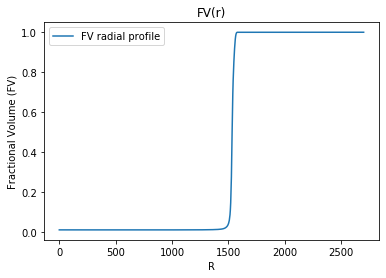

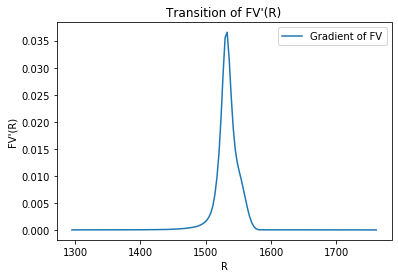

In [91]:

data['M115'].keys()
data['M115'][1360]
FV = data['M115'][1360]['FVcld']
R = data['M115'][1360]['R']

#2
plt.plot(R, FV, label='FV radial profile')
plt.xlabel("R")
plt.ylabel("Fractional Volume (FV)")
plt.legend()
plt.title('FV(r)')
plt.show()

#3
dFVdt = np.gradient(FV, R)
#trim to area around transition
R = R[300:450]
dFVdt = dFVdt[300:450]

plt.plot(R, dFVdt, label='Gradient of FV')
plt.xlabel("R")
plt.ylabel("FV'(R)")
plt.legend()
plt.title("Transition of FV'(R)")
plt.show()

4. Fit the gradient with a Gaussian with the fit parameters  𝐴 ,  𝜇  an  𝜎  as in class using only those values of the gradient of FV that are larger than  50%  of the max of grad FV.
5. Check the quality of your fit visually by overplotting it to the data.
6. Enter the fit value of  𝜎  into quiz M115-1360-sigma

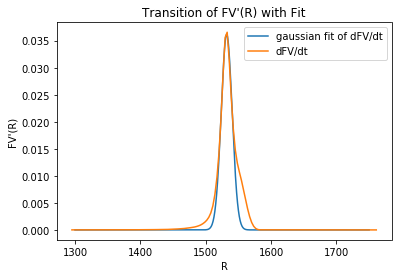

M115-1360-sigma: 8.345846


In [100]:
#4
#get indices
ind = np.where(dFVdt > 0.5* max(dFVdt))
dFVdt_1 = dFVdt[ind]
R1 = R[ind]
#function for curve fitting
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

p0 = [0.03, 1530, 20.]
coeff, var_matrix = curve_fit(gauss,R1,dFVdt_1,p0=p0)
#print(coeff)

#5
x = np.linspace(1300,1750,1000)
plt.plot(x,gauss(x,*coeff), label='gaussian fit of dFV/dt')
plt.plot(R, dFVdt, label='dFV/dt')
plt.xlabel("R")
plt.ylabel("FV'(R)")
plt.legend()
plt.title("Transition of FV'(R) with Fit")
plt.show()

#6
A, mean, sigma = coeff

print('M115-1360-sigma: %.6f' %sigma)